In [109]:
"""
    openCV에서 사용할 수 있는 crop 함수
    4분할된 이미지 리스트 반환
"""

def image_crop(file, image_width, image_height, cropped_width, cropped_height):
    cropped_images = []
    x = 0
    
    while x < image_width:
        y = 0
        while y < image_height:
            cropped_image = file[x : x + cropped_width, y : y + cropped_height]
            cropped_images.append(cropped_image)
            y += cropped_height
        x += cropped_width
    
    return cropped_images

In [110]:
def data_generator(file, image_width, image_height):
    img_bgr = cv2.imread(file , cv2.IMREAD_COLOR)
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img_rgb, (image_width, image_height))

    return img

In [111]:
import random
import cv2

"""이미지 증강 함수"""

def image_augmentation(files, index, limit, image_width, image_height):
    random_num = []
    X_array =[]
    y_array = []
    images = []
    data = []
    
    while len(images) < limit:
        try:
            while True:
                i = random.randrange(len(files))
                if i not in random_num or len(random_num) == len(files):
                    break
            random_num.append(i)

            file = files[i]
            
            img = data_generator(file, image_width, image_height)

            images.append(img)
            images.append(cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE))  # 시계 방향으로 90도 회전
            images.append(cv2.rotate(img, cv2.ROTATE_180))  # 180도 회전
            images.append(cv2.rotate(img, cv2.ROTATE_90_COUNTERCLOCKWISE)) # 반시계 방향 90도 회전
            
            #for image in images:
             #   data = np.asarray(image)
              #  X_array.append(data)
               # y_array.append(index)
                #if len(X_array) >= limit:
                 #   break
        
        except Exception as e:
            print(e)
            print(str(i)+" 번째에서 에러 ")
            #             remove(f)
    
    for image in images:
        cropped_images = image_crop(image, image_width, image_height, image_width // 2, image_height // 2)
        for cropped_image in cropped_images:
            data = np.asarray(cropped_image)
            X_array.append(data)
            y_array.append(index)
    

    
    return X_array, y_array

In [112]:
import random

"""이미지 뽑기 함수"""

def image_selector(files, index, limit, image_width, image_height):
    random_files = []
    random_num = []
    X_array = []
    y_array = []
    data = []
        
    while len(random_num) < limit:
        rand = random.randrange(len(files))
        if rand not in random_num or len(random_num) == len(files):
            random_num.append(rand)
            random_files.append(files[rand])
            
    
#     print(random_files)
    
    for i, f in enumerate(random_files):
        try:
            img = data_generator(f, image_width, image_height)
            cropped_images = image_crop(img, image_width, image_height, image_width // 2, image_height // 2)
            
            for image in cropped_images:
                data = np.asarray(image)
                X_array.append(data)
                y_array.append(index)

        except Exception as e:
            print(e)
            print(str(i)+" 번째에서 에러 ")
    #             remove(f)
            
    return X_array, y_array

In [113]:
import os, glob

"""하위 폴더 및 파일 탐색"""
    
def is_dir_file(dir_path, dir_list, img_limit, img_limit_list):
    
    folders = os.listdir(dir_path)
    
    for folder in folders:
        path_detail = os.path.join(dir_path, folder)
        
        if os.path.isdir(path_detail):
            new_img_limit = int(img_limit / len(folders))   
            is_dir_file(path_detail, dir_list, new_img_limit, img_limit_list)
        else:    
            print(dir_path + ' img limit : ' + str(img_limit))
            dir_list.append(dir_path)
            img_limit_list.append(img_limit)
            return

In [114]:
#본 코드 시작

import cv2
import os, glob
from os import remove
import numpy as np

img_dir = './binary_cnn_majority/train'
categories = ['ad', 'non_ad']
#categories = os.listdir(img_dir)

size = 320

sum = 0
ad_index = 0
non_ad_index = 1
image_width, image_height = size, size

# file_directory = []
file_list_index = []
img_limit_list = []
X = []
y = []


np_classes = len(categories)    
print(categories)

for i, category in enumerate(categories):
    file_directory = []
    img_dir_detail = os.path.join(img_dir, category)
    
    if i == ad_index:
        img_limit = 1600
    elif i == non_ad_index:
        img_limit = 1600
        
    is_dir_file(img_dir_detail, file_directory, img_limit, img_limit_list)
    
    for directory in file_directory:
        file_list_index.append([i, directory])
#     file_list_index.append([i, file_directory])
    
# print(file_directory)
print(file_list_index)

for lst in file_list_index:
#     print(lst)
    print(lst[0])

count = 0

for index, directory in file_list_index:
    print(directory)
    files = glob.glob(directory + "/*.jpg")
    len_file = len(files)

    img_limit = img_limit_list[count]

    if len_file <img_limit:
        X_temp, y_temp = image_augmentation(files, index, img_limit, image_width, image_height)
    else:
        X_temp, y_temp = image_selector(files, index, img_limit, image_width, image_height)

    X = X + X_temp
    y = y + y_temp

    len_file = len(X_temp)
    print(directory + '파일 길이 : ' + str(len_file))
    sum += len_file
    count += 1
        
    
print('총 파일 길이 : ' + str(sum))

X = np.array(X)
Y = np.array(y)

print(len(X), len(Y))

"""이미지 크기 인자를 조절하면서 적용"""

['ad', 'non_ad']
./binary_cnn_majority/train\ad\bill img limit : 145
./binary_cnn_majority/train\ad\coin img limit : 145
./binary_cnn_majority/train\ad\general_product img limit : 145
./binary_cnn_majority/train\ad\graph img limit : 145
./binary_cnn_majority/train\ad\human img limit : 145
./binary_cnn_majority/train\ad\lotto_N img limit : 145
./binary_cnn_majority/train\ad\lotto_P img limit : 145
./binary_cnn_majority/train\ad\microbe img limit : 145
./binary_cnn_majority/train\ad\part_of_human img limit : 145
./binary_cnn_majority/train\ad\photoshop img limit : 145
./binary_cnn_majority/train\ad\picture img limit : 145
./binary_cnn_majority/train\non_ad img limit : 1600
[[0, './binary_cnn_majority/train\\ad\\bill'], [0, './binary_cnn_majority/train\\ad\\coin'], [0, './binary_cnn_majority/train\\ad\\general_product'], [0, './binary_cnn_majority/train\\ad\\graph'], [0, './binary_cnn_majority/train\\ad\\human'], [0, './binary_cnn_majority/train\\ad\\lotto_N'], [0, './binary_cnn_majority/

'이미지 크기 인자를 조절하면서 적용'

In [115]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y)

print(X_train.shape)
print(X_train.shape[0])
print(y_train.shape)
print(y_test.shape)
print(np.bincount(y_train))
print(np.bincount(y_test))

(9633, 160, 160, 3)
9633
(9633,)
(3211,)
[4808 4825]
[1636 1575]


In [116]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization

In [117]:
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

In [118]:
# import os
import keras.backend.tensorflow_backend as K
from tensorflow.keras import optimizers

lrate=0.009
op = optimizers.RMSprop(lr=lrate)

dr = 0.15

with K.tf_ops.device('/device:GPU:0'):
    model = Sequential()

    model.add(Conv2D(32, (3,3), padding="same", input_shape=X_train.shape[1:], activation="relu"))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(BatchNormalization())
    model.add(Dropout(dr))

    model.add(Conv2D(32, (3,3), padding="same", activation="relu"))
    model.add(Conv2D(32, (3,3), padding="same", activation="relu"))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(BatchNormalization())
    model.add(Dropout(dr))
    

    model.add(Conv2D(64, (3,3), padding="same", activation="relu"))
    model.add(Conv2D(64, (3,3), padding="same", activation="relu"))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(dr))
    model.add(BatchNormalization())

    model.add(Conv2D(64, (3,3), padding="same", activation="relu"))
    #model.add(Conv2D(64, (3,3), padding="same", activation="relu"))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(dr))
    model.add(BatchNormalization())

    #model.add(Conv2D(128, (3,3), padding="same", activation="relu"))
    #model.add(Conv2D(128, (3,3), padding="same", activation="relu"))
    # model.add(Dropout(0.15))
    #model.add(BatchNormalization())

    model.add(Flatten())
    model.add(Dense(256, activation="relu"))
    model.add(Dropout(dr))
    model.add(Dense(1, activation="sigmoid"))

    model.compile(loss='binary_crossentropy', optimizer=op, metrics=['accuracy'])

In [119]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_42 (Conv2D)           (None, 160, 160, 32)      896       
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 80, 80, 32)        0         
_________________________________________________________________
batch_normalization_v1_28 (B (None, 80, 80, 32)        128       
_________________________________________________________________
dropout_35 (Dropout)         (None, 80, 80, 32)        0         
_________________________________________________________________
conv2d_43 (Conv2D)           (None, 80, 80, 32)        9248      
_________________________________________________________________
conv2d_44 (Conv2D)           (None, 80, 80, 32)        9248      
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 40, 40, 32)        0         
__________

In [120]:
batch = 32
epoch = 40

history = model.fit(X_train, y_train, batch_size=batch, epochs=epoch, validation_split=0.15, verbose=1)

Train on 8188 samples, validate on 1445 samples
Epoch 1/40
8188/8188 [==============================] - 20s 2ms/sample - loss: 7.2620 - acc: 0.5403 - val_loss: 7.1557 - val_acc: 0.5474
Epoch 2/40
8188/8188 [==============================] - 16s 2ms/sample - loss: 7.4977 - acc: 0.5296 - val_loss: 7.1190 - val_acc: 0.5529
Epoch 3/40
8188/8188 [==============================] - 16s 2ms/sample - loss: 7.9641 - acc: 0.5004 - val_loss: 8.4780 - val_acc: 0.4685
Epoch 4/40
8188/8188 [==============================] - 16s 2ms/sample - loss: 7.0378 - acc: 0.5586 - val_loss: 7.0657 - val_acc: 0.5585
Epoch 5/40
8188/8188 [==============================] - 16s 2ms/sample - loss: 6.9045 - acc: 0.5672 - val_loss: 7.1062 - val_acc: 0.5564
Epoch 6/40
8188/8188 [==============================] - 16s 2ms/sample - loss: 6.8474 - acc: 0.5707 - val_loss: 8.0761 - val_acc: 0.4934
Epoch 7/40
8188/8188 [==============================] - 16s 2ms/sample - loss: 6.7481 - acc: 0.5766 - val_loss: 6.6726 - val_acc: 

In [121]:
model.save('./binary_cnn_majority/model/size/binary_model_saved' + str(size) + '.h5')

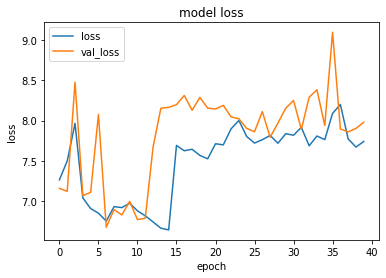

In [122]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss', 'val_loss'], loc='upper left')
plt.show()

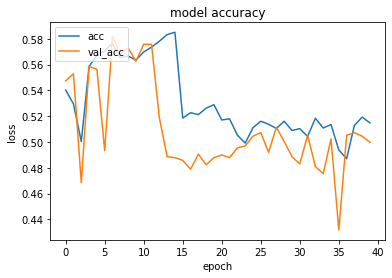

In [123]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'] )
plt.title('model accuracy')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['acc', 'val_acc'], loc='upper left')
plt.show()